<a href="https://colab.research.google.com/github/nandansuresh97/practise-/blob/main/out1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data = pd.read_csv("/content/beer-servings.csv", index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

array([[<Axes: title={'center': 'beer_servings'}>,
        <Axes: title={'center': 'spirit_servings'}>],
       [<Axes: title={'center': 'wine_servings'}>,
        <Axes: title={'center': 'total_litres_of_pure_alcohol'}>]],
      dtype=object)

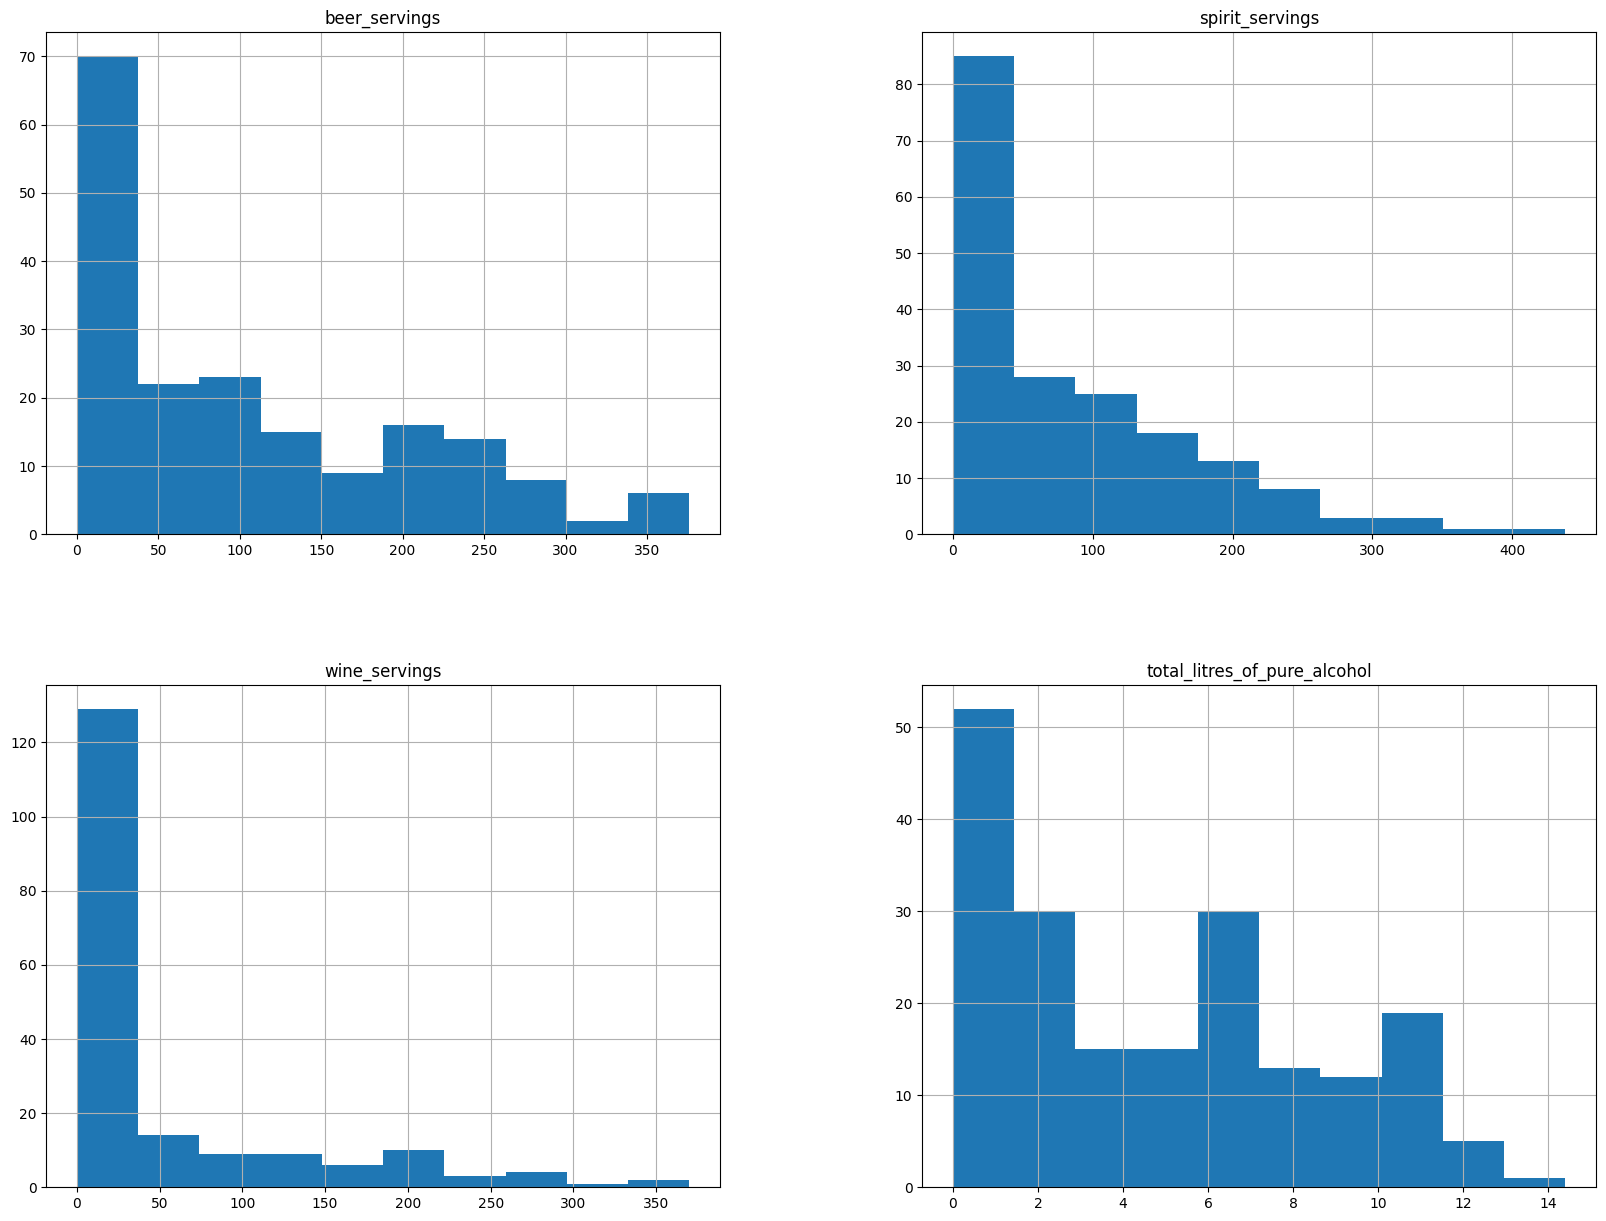

In [ ]:
freqgraph = data.select_dtypes(include="float64")
freqgraph.hist(figsize=(20,15))

In [ ]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())
data['spirit_servings'] = data['spirit_servings'].fillna(data['spirit_servings'].median())
data['wine_servings'] = data['wine_servings'].fillna(data['wine_servings'].median())
data['total_litres_of_pure_alcohol'] = data['total_litres_of_pure_alcohol'].fillna(data['total_litres_of_pure_alcohol'].median())

In [ ]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [ ]:
num_cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']

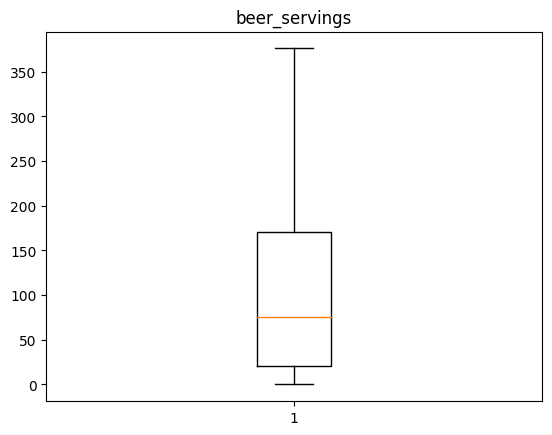

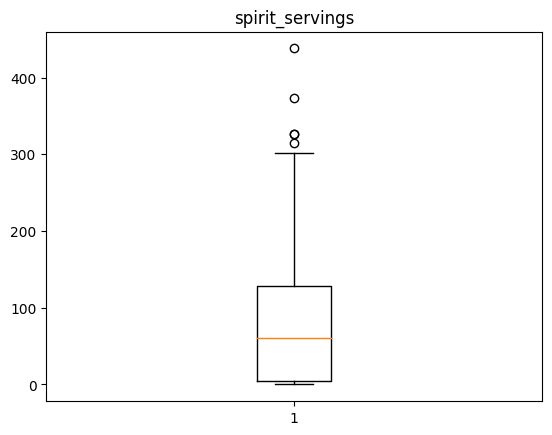

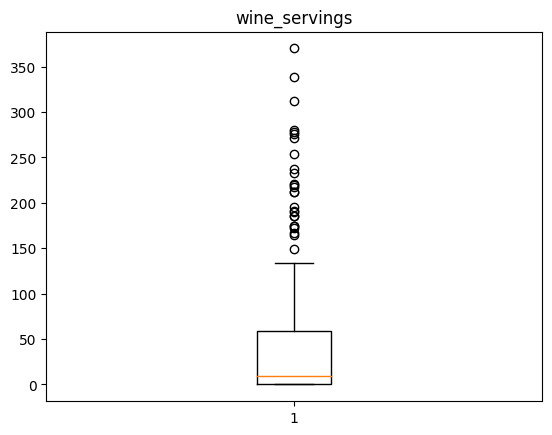

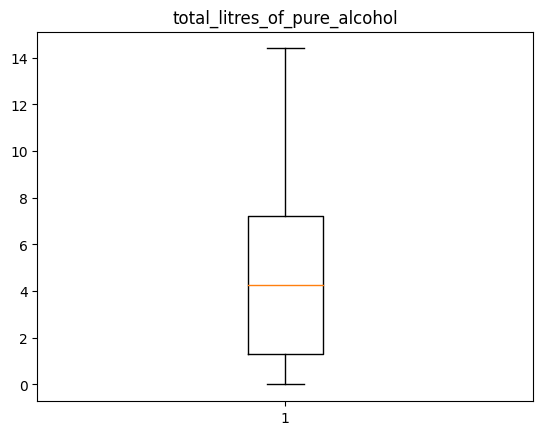

In [ ]:
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [ ]:
Q1 = np.percentile(data['wine_servings'],25,method='midpoint')
Q2 = np.percentile(data['wine_servings'],50,method='midpoint')
Q3 = np.percentile(data['wine_servings'],75,method='midpoint')

In [ ]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  1.0
Q2 is  9.0
Q3 is  59.0


In [ ]:
IQR = Q3-Q1
IQR

58.0

In [ ]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [ ]:
print("lower limit is ",low_lim)
print("upper limit is ",up_lim)

lower limit is  -86.0
upper limit is  146.0


In [ ]:
outlier=[]
for x in data['wine_servings']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [ ]:
data['wine_servings'] = data['wine_servings'].clip(lower=low_lim , upper=up_lim)

In [ ]:
outlier=[]
for x in data['wine_servings']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
outlier

[]

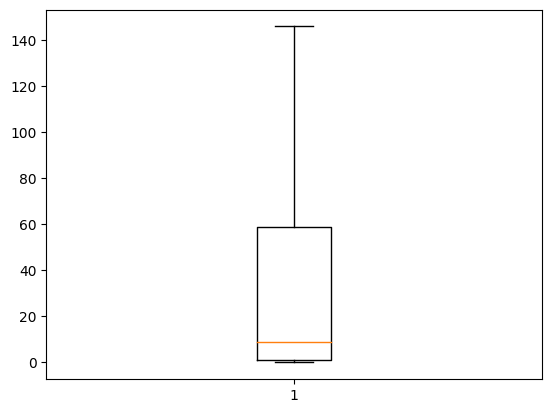

In [ ]:
plt.boxplot(data['wine_servings'])
plt.show()